# Machine Learning Project - Breast Cancer

## K Nearest Neighbors

In this project, the goal is to create a classifier using SciKit-learn and K-Nearest Neighbor which is trained to predict whether a patient has breast cancer.

### Import Python Modules and Load the data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [4]:
breast_cancer_data = load_breast_cancer()

# Take a look on how does the data construct
print(breast_cancer_data.data[0])
print('\n Feature Names:\n', breast_cancer_data.feature_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]

 Feature Names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Print out the names of target variable to find out what can it classifies. By looking at the `target_names`, it indicates that `0` corresponds to `malignant`.

In [8]:
print(breast_cancer_data.target[0:50])
print('\n Target Names:', breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1]

 Target Names: ['malignant' 'benign']


### Split the data into Training and Validation Sets.

In [10]:
training_data, validation_data, training_labels, validation_labels = train_test_split(\
                        breast_cancer_data.data, breast_cancer_data.target, \
                        test_size=0.2, random_state=100)

In [11]:
# Confirm that the training and validation sets work as expected, 
# which should have the same size.
print(len(training_data), len(training_labels))

455 455


### Create Classifier with SciKit-Learn
Now, create a `KNeighborsClassifier` with `k=3`. Then, train the classifier using the training set and labels.

In [12]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [13]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=3)

Use the validation sets to check the accuracy rate of the classifier on the validation sets.

In [14]:
score = classifier.score(validation_data, validation_labels)
print(score)

0.9473684210526315


Test on different `k` values to see whether there is a better `k` to increase accuracy of the classifier. The result below indicates that `k=23` produces a better accuracy with the classifier.

In [46]:
# max_score = max(map(lambda x: x[-1], lst))

score_max = 0
accuracies = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    score = classifier.score(validation_data, validation_labels)
    accuracies.append(score)
    if score_max < score:
        score_max = score
        max_index_score = (k, score_max)

print(max_index_score)

(23, 0.9649122807017544)


### Visualization on Classifier Accuracy

Create a graph of validation accuracy.

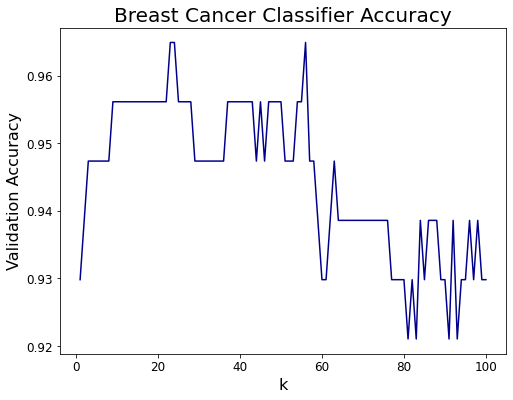

In [54]:
k_list = range(1, 101)

plt.figure(figsize=(8,6))
plt.plot(k_list, accuracies, color='darkblue')
plt.xlabel('k', fontsize=16)
plt.ylabel('Validation Accuracy', fontsize=16)
plt.title('Breast Cancer Classifier Accuracy', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()